# Keşif

In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import os

## Veriyi Al

In [2]:
from olist.data import Olist
data = Olist().get_data()

In [4]:
data.keys()

dict_keys(['geolocation', 'order_payments', 'products', 'sellers', 'order_items', 'customers', 'orders', 'product_category_name_translation', 'order_reviews'])

Olist e-ticaret platformundaki her işlem şu özelliklere sahiptir:
- satın alacak olan bir `customer_id`...
- çeşitli `product_id`...
- bir `seller_id`...
- ve bir `review_id`...
- tüm bunlar bir `order_id`'ye aittir.

## Çeşitli DataFrame'lerinizin kardinalitelerini araştırın

❓ **Kaç tane benzersiz `orders`, `reviews`, `sellers`, `products` and `customers` var ?**

In [5]:
tables = {
    "orders": data["orders"],
    "reviews": data["order_reviews"],
    "sellers": data["sellers"],
    "products": data["products"],
    "customers": data["customers"],
}

unique_counts = {}

for name, df in tables.items():
    unique_counts[name] = df.iloc[:, 0].nunique()

unique_counts

{'orders': 99441,
 'reviews': 98410,
 'sellers': 3095,
 'products': 32951,
 'customers': 99441}

❓ **Sipariş başına kaç tane yorum(reviews) var? Tüm siparişler için yorum var mı?**
<details>
    <summary markdown=‘span’>İpuçları</summary>

Bu bilgiye bireysel csv dosyanızdan doğrudan erişemezsiniz. Öğrenmek için tabloları birleştirmeniz gerekir. Hangi tür birleştirme yapmanız gerektiğini düşünün.

Hangi tablolara ihtiyacınız olduğundan emin değil misiniz? Öğrenmek için ERD'nize geri dönün.

Yorum sayısını öğrenmek için: `order_id` başına yorum sayısını sayın ve bir histogram çizin. Pandas serisinde `.hist()` kullanabilirsiniz.
</details>

In [6]:
orders = data["orders"][["order_id"]]
reviews = data["order_reviews"][["order_id", "review_id"]]

In [7]:
reviews_per_order = (
    reviews
    .groupby("order_id")
    .count()
    .rename(columns={"review_id": "review_count"})
)

In [8]:
orders_with_reviews = orders.merge(
    reviews_per_order,
    on="order_id",
    how="left"
)

<Axes: >

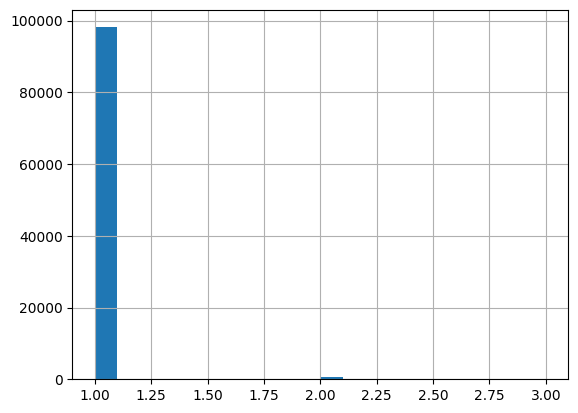

In [9]:
orders_with_reviews["review_count"].hist(bins=20)

In [10]:
no_review_count = orders_with_reviews["review_count"].isna().sum()
no_review_count

768

🧪 **Test your code below**

Yorum eksik olan siparişlerin sayısını `int` olarak `n_missing_reviews` adlı bir değişkende saklayın.

In [11]:
n_missing_reviews = int(no_review_count)

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('exploratory',
    n=n_missing_reviews
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/selen/.pyenv/versions/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/selen/olist-work/challenges/data-exploratory-analysis/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 1 item

test_exploratory.py::TestExploratory::test_n_missing_reviews PASSED      [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/exploratory.pickle

git commit -m 'Completed exploratory step'

git push origin master

